<a href="https://colab.research.google.com/github/rll/deepul/blob/master/homeworks/hw1/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

## Overview
This semester, all homeworks will be conducted through Google Colab notebooks. All code for the homework assignment will be written and run in this notebook. Running in Colab will automatically provide a GPU, but you may also run this notebook locally by following [these instructions](https://research.google.com/colaboratory/local-runtimes.html) if you wish to use your own GPU.

You will save images in the notebooks to use and fill out a given LaTeX template which will be submitted to Gradescope, along with your notebook code.

## Using Colab
On the left-hand side, you can click the different icons to see a Table of Contents of the assignment, as well as local files accessible through the notebook.

Make sure to go to **Runtime -> Change runtime type** and select **GPU** as the hardware accelerator. This allows you to use a GPU. Run the cells below to get started on the assignment. Note that a session is open for a maximum of 12 hours, and using too much GPU compute may result in restricted access for a short period of time. Please start the homework early so you have ample time to work.

**If you load this notebook by clicking "Open in Colab" from github, you will need to save it to your own Google Drive to keep your work.**

## General Tips
In each homework problem, you will implement autoregressive models and run it on various datasets. Oftentime you will run it on two datasets (dataset 1 and dataset 2). In these cases, the expected outputs for dataset 1 are already provided to help as a sanity check.

Feel free to print whatever output (e.g. debugging code, training code, etc) you want, as the graded submission will be the submitted pdf with images.

After you complete the assignment, download all of the images outputted in the results/ folder and upload them to the figure folder in the given latex template.

There is a lot of freedom in this homework to design write and design your own models. Hyperparameters are given as a guide to show what worked for us, but feel free to explore and use what you find is best!

Run the cells below to download and load up the starter code.

In [7]:
! ls

L7 Self-Supervised Learning (SP24).pdf
L8 Large Language Models (SP24) -- guest lecture Hao Liu.pdf
README.md
data
deepul
demo_rotray.ipynb
homeworks
hw1.ipynb
hw2.ipynb
hw3.ipynb
hw4.ipynb
model.pth
results
setup.py


In [11]:
# !if [ -d deepul ]; then rm -Rf deepul; fi
# !git clone https://github.com/rll/deepul.git 
!unzip -qq deepul/homeworks/hw1/data/hw1_data.zip -d deepul/homeworks/hw1/data/
# !pip install ./deepul

In [1]:
import numpy as np
from deepul.hw1_helper import (
    # Q1
    visualize_q1_data,
    q1_sample_data_1,
    q1_sample_data_2,
    q1_save_results,
    # Q2
    q2a_save_results,
    q2b_save_results,
    visualize_q2a_data,
    visualize_q2b_data,
    # Q3
    q3ab_save_results,
    q3c_save_results,
    # Q4
    q4a_save_results,
    q4b_save_results,
    # Q5
    visualize_q5_data,
    q5a_save_results,
    # Q6
    visualize_q6_data,
    q6a_save_results,
    plot_q6a_samples
)

In [2]:
from deepul.utils import (
    get_data_dir,
    load_colored_mnist_text,
    load_pickled_data,
    load_text_data,
    save_distribution_1d,
    save_distribution_2d,
    save_text_to_plot,
    save_timing_plot,
    save_training_plot,
    savefig,
    show_samples,
)

from os.path import dirname, join

import matplotlib.pyplot as plt
import numpy as np
import torch


# Question 1: 1D Data

In this question, we will train simple generative models on discrete 1D data.

Execute the cell below to visualize our datasets

In [ ]:
visualize_q1_data(dset_type=1)
visualize_q1_data(dset_type=2)

## Part (a) Fitting a Histogram

Let $\theta = (\theta_0, \dots, \theta_{d-1}) \in \mathbb{R}^{d}$ and define the model $p_\theta(x) = \frac{e^{\theta_x}}{\sum_{x'}e^{\theta_{x'}}}$

Fit $p_\theta$ with maximum likelihood via stochastic gradient descent on the training set, using $\theta$ initialized to zero. Use your favorite version of stochastic gradient descent, and optimize your hyperparameters on a validation set of your choice.

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. Plot the model probabilities in a bar graph with $\{0,\dots,d-1\}$ on the x-axis and a real number in $[0,1]$ on the y-axis.




Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
import numpy as np

def softmax(theta):
    e_theta = np.exp(theta - np.max(theta))  # subtract max for numerical stability
    return e_theta / e_theta.sum()

def negative_log_likelihood(data, theta):
    p_theta = softmax(theta)
    log_likelihood = -np.log(p_theta[data])
    return log_likelihood.mean()

    
def q1_a(train_data, test_data, d, dset_id):
    """
    train_data: An (n_train,) numpy array of integers in {0, ..., d-1}
    test_data: An (n_test,) numpy array of integers in {0, .., d-1}
    d: The number of possible discrete values for random variable x
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
             used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (d,) of model probabilities
    """

    # Hyperparameters (may need tuning)
    epochs = 250
    learning_rate = 0.1
    batch_size = 64

    # Initialize parameters
    theta = np.zeros(d)

    # For storing losses
    train_losses = []
    test_losses = [negative_log_likelihood(test_data, theta)]

    # Training with Stochastic Gradient Descent
    for epoch in range(epochs):
        np.random.shuffle(train_data)
        for i in range(0, len(train_data), batch_size):
            batch_data = train_data[i:i+batch_size]

            # Compute gradients
            p_theta = softmax(theta)
            grad_theta = -p_theta
            grad_theta[batch_data] += 1
            grad_theta /= len(batch_data)

            # Update parameters
            theta += learning_rate * grad_theta

            # Record training loss
            train_loss = negative_log_likelihood(batch_data, theta)
            train_losses.append(train_loss)

        # Record test loss
        test_loss = negative_log_likelihood(test_data, theta)
        test_losses.append(test_loss)

    # Compute final model probabilities
    model_probabilities = softmax(theta)

#     return train_losses, test_losses, distribution
    return np.array(train_losses), np.array(test_losses), model_probabilities

### Results

Once you've implemented `q1_a`, execute the cells below to visualize and save your results



In [ ]:
q1_save_results(1, 'a', q1_a)

In [ ]:
q1_save_results(2, 'a', q1_a)

## Part (b) Fitting Discretized Mixture of Logistics

Let us model $p_\theta(x)$ as a **discretized** mixture of 4 logistics such that $p_\theta(x) = \sum_{i=1}^4 \pi_i[\sigma((x+0.5 - \mu_i)/s_i) - \sigma((x-0.5-\mu_i)/s_i)]$

For the edge case of when $x = 0$, we replace $x-0.5$ by $-\infty$, and for $x = 99$, we replace $x+0.5$ by $\infty$.

You may find the [PixelCNN++](https://arxiv.org/abs/1701.05517) helpful for more information on discretized mixture of logistics.

**Provide the same set of corresponding deliverables as part (a)**

Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [3]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class DiscretizedMixtureOfLogistics(nn.Module):
    def __init__(self, num_mixtures, num_classes):
        super().__init__()
        self.num_mixtures = num_mixtures
        self.num_classes = num_classes
        self.pi = nn.Parameter(torch.randn(num_mixtures))

        # Initialize means (mu) uniformly distributed over the range of classes
        self.mu = nn.Parameter(torch.rand(num_mixtures) * (num_classes - 1))

        # Initialize scales (s) with random positive values
        # The scale should be positive; using exponential to ensure this
        self.s = nn.Parameter(torch.exp(torch.randn(num_mixtures)))

    def forward(self, x):
        x = x.unsqueeze(1)
        pi = torch.softmax(self.pi, dim=0)
        mu = self.mu.unsqueeze(0)
        s = torch.exp(self.s).unsqueeze(0)

        # Handling edge cases for x=0 and x=d-1
        min_x = torch.where(x > 0, (x - 0.5 - mu) / s, torch.tensor(-np.inf))
        max_x = torch.where(x < self.num_classes - 1, (x + 0.5 - mu) / s, torch.tensor(np.inf))

        min_cdf = torch.sigmoid(min_x)
        max_cdf = torch.sigmoid(max_x)

        cdf_delta = max_cdf - min_cdf
        cdf_delta = torch.clamp(cdf_delta, min=1e-12)

        # Ensure that probabilities sum to 1
        return torch.sum(pi * cdf_delta, dim=1)

In [4]:
def q1_b(train_data, test_data, d, dset_id):
    # Hyperparameters (may need tuning)
    epochs = 50
    learning_rate = 0.1
    batch_size = 20
    num_mixtures = 4

    # Convert data to PyTorch tensors
    train_data = torch.tensor(train_data, dtype=torch.float32)
    test_data = torch.tensor(test_data, dtype=torch.float32)

    # Model, optimizer, and loss function
    model = DiscretizedMixtureOfLogistics(num_mixtures, d)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    criterion = nn.NLLLoss()

    # For storing losses
    train_losses = []
    test_losses = []

    # Training Loop
    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        for i in range(0, len(train_data), batch_size):
            batch_data = train_data[i:i+batch_size]
            optimizer.zero_grad()
            # Forward pass
            probs = model(batch_data)

            # Compute negative log likelihood
            log_probs = torch.log(probs.clamp(min=1e-12))
            loss = -log_probs.mean() 

            loss.backward()
            optimizer.step()

            total_train_loss += loss.item() * batch_data.size(0)
        average_train_loss = total_train_loss / len(train_data)
        train_losses.append(average_train_loss)
#         print(train_losses, probs)
#         print(x)

        # Compute model probabilities
        model.eval()
        total_test_loss = 0
        with torch.no_grad():
            test_probs = model(test_data)
            test_log_probs = torch.log(test_probs.clamp(min=1e-12))
            test_loss = -test_log_probs.mean()
            total_test_loss += test_loss.item() * test_data.size(0)
        average_test_loss = total_test_loss / len(test_data)
        test_losses.append(average_test_loss)

    # Compute model probabilities
    with torch.no_grad():
        x = torch.arange(d, dtype=torch.float32)
        probs = model(x).numpy()

    return np.array(train_losses), np.array(test_losses), probs


### Results

Once you've implemented `q1_b`, execute the cells below to visualize and save your results



Final Test Loss: 2.5469


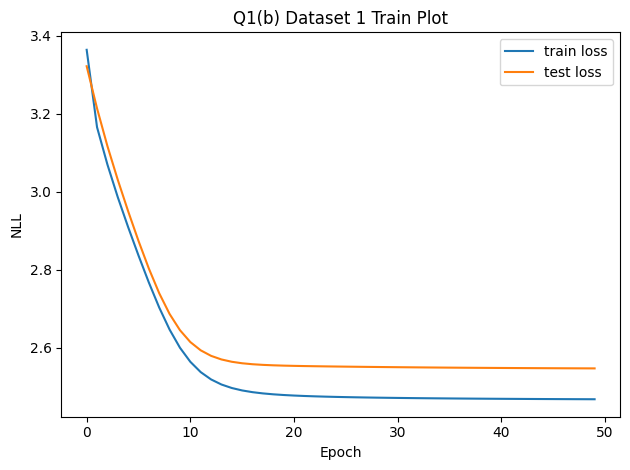

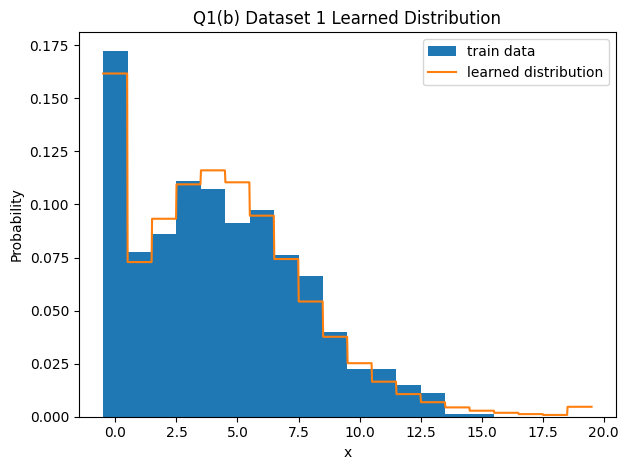

In [5]:
q1_save_results(1, 'b', q1_b)

In [ ]:
q1_save_results(2, 'b', q1_b)

# Question 2 PixelCNNs

Now, you will train more powerful PixelCNN models on the shapes dataset and MNIST. In addition, we will extend to modeling colored datasets.

Run the cell below to visualize the two datasets binary datasets

In [ ]:
visualize_q2a_data(1)
visualize_q2a_data(2)

## Part (a) PixelCNN on Shapes and MNIST
In this part, implement a simple PixelCNN architecture to model binary MNIST and shapes images (same as Q2(b), but with a PixelCNN).

We recommend the following network design:
* A $7 \times 7$ masked type A convolution
* $5$ $7 \times 7$ masked type B convolutions
* $2$ $1 \times 1$ masked type B convolutions
* Appropriate ReLU nonlinearities in-between
* 64 convolutional filters

And the following hyperparameters:
* Batch size 128
* Learning rate $10^{-3}$
* 10 epochs
* Adam Optimizer (this applies to all PixelCNN models trained in future parts)

Your model should output logits, after which you could apply a sigmoid over 1 logit, or a softmax over two logits (either is fine). It may also help to scale your input to $[-1, 1]$ before running it through the network. 

Training on the shapes dataset should be quick, and MNIST should take around 10 minutes

Checkout the Paper for more details: https://arxiv.org/abs/1601.06759

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model



Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MaskedConv2d(nn.Conv2d):
    def __init__(self, mask_type, *args, **kwargs):
        super(MaskedConv2d, self).__init__(*args, **kwargs)
        assert mask_type in ['A', 'B']
        self.register_buffer('mask', self.weight.data.clone())
        _, _, kH, kW = self.weight.size()
        self.mask.fill_(1)
        self.mask[:, :, kH // 2, kW // 2 + (mask_type == 'B'):] = 0
        self.mask[:, :, kH // 2 + 1:] = 0

    def forward(self, x):
        self.weight.data *= self.mask
        return super(MaskedConv2d, self).forward(x)

class PixelCNN(nn.Module):
    def __init__(self, input_channels=1, num_filters=64):
        super(PixelCNN, self).__init__()
        self.layers = nn.Sequential(
            # 1 Masked type A convolution
            MaskedConv2d('A', input_channels, num_filters, 7, padding=3),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(),

            # 5 Masked type B convolutions
            MaskedConv2d('B', num_filters, num_filters, 7, padding=3),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(),
            MaskedConv2d('B', num_filters, num_filters, 7, padding=3),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(),
            MaskedConv2d('B', num_filters, num_filters, 7, padding=3),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(),
            MaskedConv2d('B', num_filters, num_filters, 7, padding=3),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(),
            MaskedConv2d('B', num_filters, num_filters, 7, padding=3),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(),

            # 2 Masked type B 1x1 convolutions
            MaskedConv2d('B', num_filters, num_filters, 1),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(),
            MaskedConv2d('B', num_filters, 32, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            # Final 1x1 convolution without mask
            nn.Conv2d(32, 1, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.to(torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))
        return self.layers(x)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

def sample_from_pixelcnn(model, num_samples, image_shape, device):
    model.eval()
    samples = torch.zeros(num_samples, 1, *image_shape, dtype=torch.float32, device=device)
    print(f"sample shape: {samples.shape}")
    with torch.no_grad():
        for i in range(image_shape[0]):
            for j in range(image_shape[1]):
                # print(samples)
                out = (model(2*(samples - 0.5)))
                # print(out,i,j,torch.bernoulli(out[:, :, i, j]))
                samples[:, :, i, j] = torch.bernoulli(out[:, :, i, j])
    # Permute the dimensions from [N, C, H, W] to [N, H, W, C]
    samples = samples.permute(0, 2, 3, 1).contiguous()

    return samples.cpu().numpy()

def q2_a(train_data, test_data, image_shape, dset_id):
    """
    train_data: A (n_train, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
    test_data: A (n_test, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
    image_shape: (H, W), height and width of the image
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, 1) of samples with values in {0, 1}
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    batch_size = 128
    learning_rate = 1e-3
    epochs = 10

    # Model Initialization
    model = PixelCNN(input_channels=1, num_filters=64).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criteria = nn.BCELoss()

    # Training and Testing Loops
    train_losses = []
    test_losses = []

    for iteration in range(epochs):
        for i in range(train_data.shape[0] // batch_size):
            batch_data = train_data[i * batch_size:(i + 1) * batch_size]
            batch_data_tensor = torch.from_numpy(batch_data).permute(0, 3, 1, 2).type(torch.float)
            inputs = (2 * (batch_data_tensor - 0.5))
            outs = model(inputs)
            loss = criteria(outs, batch_data_tensor.to(device))
            # loss = torch.mean(torch.mul(outs - batch_data_tensor.to(device), outs - batch_data_tensor.to(device)))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        with torch.no_grad():
            test_data_tensor = torch.from_numpy(test_data).permute(0, 3, 1, 2).type(torch.float)
            outs = model(2 * (test_data_tensor - 0.5))
            evaluation = criteria(outs, test_data_tensor.to(device))
            train_losses.append(loss.item())
            test_losses.append(evaluation.item())
            print("\niteration {}\ntrain loss {}\ntest loss {}".format(iteration, loss, evaluation))

    # Sampling from the Model
    samples = sample_from_pixelcnn(model, 100, image_shape, device)

    return np.array(train_losses), np.array(test_losses), samples, model


In [ ]:
np.random.random(size=(1,)) < 1

### Results

Once you've implemented `q2_a`, execute the cells below to visualize and save your results



In [ ]:

# Question 2
def q2a_save_results(dset_type, q3_a):
    data_dir = get_data_dir(1)
    if dset_type == 1:
        train_data, test_data = load_pickled_data(join(data_dir, "shapes.pkl"))
        img_shape = (20, 20)
    elif dset_type == 2:
        train_data, test_data = load_pickled_data(join(data_dir, "mnist.pkl"))
        img_shape = (28, 28)
    else:
        raise Exception()

    train_losses, test_losses, samples, model = q3_a(
        train_data, test_data, img_shape, dset_type
    )
    samples = samples.astype("float32") * 255

    print(f"Final Test Loss: {test_losses[-1]:.4f}")
    save_training_plot(
        train_losses,
        test_losses,
        f"Q2(a) Dataset {dset_type} Train Plot",
        f"results/q2_a_dset{dset_type}_train_plot.png",
    )
    show_samples(samples, f"results/q2_a_dset{dset_type}_samples.png")
    return model

In [ ]:
model = q2a_save_results(1, q2_a)

In [ ]:
model = q2a_save_results(2, q2_a)

In [ ]:
class MaskedConv2d(torch.nn.Conv2d):
    def __init__(self, mask_type, c_in, c_out, k_size, stride, pad):
        """2D Convolution with masked weight for Autoregressive connection"""
        super(MaskedConv2d, self).__init__(
            c_in, c_out, k_size, stride, pad, bias=False)
        assert mask_type in ['A', 'B']
        self.mask_type = mask_type
        ch_out, ch_in, height, width = self.weight.size()

        mask = torch.ones(ch_out, ch_in, height, width)
        mask[:, :, height // 2, width // 2:] = 0
        mask[:, :, height // 2 + 1:, :] = 0
        mask[:, :, height // 2, width // 2] = 1 if self.mask_type == 'B' else 0
        self.register_buffer('mask', mask)

    def forward(self, x):
        self.weight.data *= self.mask
        return super(MaskedConv2d, self).forward(x)


class PixelCNN(torch.nn.Module):
    def __init__(self, channel_in, channel_out):
        super().__init__()
        self.maskA_block = torch.nn.Sequential(
            MaskedConv2d('A', channel_in, 64, 7, 1, 3),
            torch.nn.ReLU(),
            MaskedConv2d('A', 64, 64, 7, 1, 3),
            torch.nn.ReLU(),
            MaskedConv2d('A', 64, 64, 7, 1, 3),
            torch.nn.ReLU(),
        )

        self.maskB_block = torch.nn.Sequential(
            MaskedConv2d('B', 64, 64, 7, 1, 3),
            torch.nn.ReLU(),
            MaskedConv2d('B', 64, 64, 7, 1, 3),
            torch.nn.ReLU(),
            MaskedConv2d('B', 64, 64, 7, 1, 3),
            torch.nn.ReLU(),
            MaskedConv2d('B', 64, 64, 7, 1, 3),
            torch.nn.ReLU(),
            MaskedConv2d('B', 64, 64, 7, 1, 3),
            torch.nn.ReLU()

        )

        self.one_one_conv = torch.nn.Sequential(
            MaskedConv2d('B', 64, 32, 1, 1, 0),
            torch.nn.ReLU(),
            MaskedConv2d('B', 32, channel_out, 1, 1, 0),
            torch.nn.Sigmoid()
        )

    def forward(self, inputs):
        inputs = inputs.to(torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))
        outs = self.maskA_block(inputs)
        outs = self.maskB_block(outs)
        return self.one_one_conv(outs)


def q3_a(train_data, test_data, image_shape, dset_id):
    """
    train_data: A (n_train, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
    test_data: A (n_test, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
    image_shape: (H, W), height and width of the image
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
             used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, 1) of samples with values in {0, 1}
    """

    """ YOUR CODE HERE """
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model = PixelCNN(1, 1).to(device)
    epoch = 30
    lr = 1e-3
    batch_size = 128
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    train_losses = []
    test_losses = []
    criteria = torch.nn.BCELoss()
    for iteration in range(epoch):
        for i in range(train_data.shape[0] // batch_size):
            batch_data = train_data[i * batch_size:(i + 1) * batch_size]
            batch_data_tensor = torch.from_numpy(batch_data).permute(0, 3, 1, 2).type(torch.float)
            outs = model(2 * (batch_data_tensor - 0.5))
            loss = criteria(outs, batch_data_tensor.to(device))
            # loss = torch.mean(torch.mul(outs - batch_data_tensor.to(device), outs - batch_data_tensor.to(device)))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        with torch.no_grad():
            test_data_tensor = torch.from_numpy(test_data).permute(0, 3, 1, 2).type(torch.float)
            outs = model(2 * (test_data_tensor - 0.5))
            evaluation = criteria(outs, test_data_tensor.to(device))
            train_losses.append(loss.item())
            test_losses.append(evaluation.item())
            print("\niteration {}\ntrain loss {}\ntest loss {}".format(iteration, loss, evaluation))
    with torch.no_grad():
        image = torch.zeros((100, image_shape[0], image_shape[1], 1))
        for j in range(image_shape[0]):
            for k in range(image_shape[1]):
                outs = model(2 * (image.permute(0, 3, 1, 2).type(torch.float) - 0.5))
                image.data[:, j, k, 0] = torch.from_numpy(
                    np.random.random(size=(100,)) < outs[:, 0, j, k].cpu().numpy())
    return train_losses, test_losses, image.numpy(), model


In [ ]:
# Question 3
def q3a_save_results(dset_type, q3_a):
    data_dir = get_data_dir(1)
    if dset_type == 1:
        train_data, test_data = load_pickled_data(join(data_dir, 'shapes.pkl'))
        img_shape = (20, 20)
    elif dset_type == 2:
        train_data, test_data = load_pickled_data(join(data_dir, 'mnist.pkl'))
        img_shape = (28, 28)
    else:
        raise Exception()

    train_losses, test_losses, samples, model = q3_a(train_data, test_data, img_shape, dset_type)
    samples = samples.astype('float32') * 255

    print(f'Final Test Loss: {test_losses[-1]:.4f}')
    save_training_plot(train_losses, test_losses, f'Q3(a) Dataset {dset_type} Train Plot',
                       f'results/q3_a_dset{dset_type}_train_plot.png')
    show_samples(samples, f'results/q3_a_dset{dset_type}_samples.png')

In [ ]:
q3a_save_results(1, q3_a)

## Part (b) PixelCNN on Colored Shapes and MNIST: Independent Color Channels

For the next part, we'll work with color images (shapes and MNIST). Run the cell below to visualize the dataset.

In [ ]:
visualize_q2b_data(1)
visualize_q2b_data(2)

Now, implement a PixelCNN to support RGB color channels (or augment your existing implementation). **First, implement a PixelCNN that assumes color channels as independent.** More formally, we model the following parameterized distribution:

$$p_\theta(x) = \prod_{i=1}^{HW}\prod_{c=1}^C p_\theta(x_i^c | x_{<i})$$

Here are some tips that you may find useful for designing and training these models:
* You will need a 4-way softmax for every prediction, as opposed to a 256-way softmax in the PixelCNN paper, since the dataset is quantized to two bits per color channel
* You can set the number of filters for each convolutions to 120. You can use the ReLU nonlinearity throughout.
* Use a stack of 8 residual block architecture from [Figure 5](https://arxiv.org/abs/1601.06759) but with 7 x 7 masked convolutions in the middle instead of 3 x 3 masked convolutions
* Consider using [layer normalization](https://arxiv.org/abs/1607.06450) to improve performance. However, be careful to maintain the autoregressive property.
* With a learning rate of $10^{-3}$ and a batch size of 128, it should take a few minutes to run on the shapes dataset, and about 50-60 minutes on MNIST.

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MaskedConv2d(torch.nn.Conv2d):
    def __init__(self, mask_type, c_in, c_out, k_size, stride, pad):
        """2D Convolution with masked weight for Autoregressive connection"""
        super(MaskedConv2d, self).__init__(
            c_in, c_out, k_size, stride, pad, bias=False)
        assert mask_type in ['A', 'B']
        self.mask_type = mask_type
        ch_out, ch_in, height, width = self.weight.size()

        mask = torch.ones(ch_out, ch_in, height, width)
        mask[:, :, height // 2, width // 2:] = 0
        mask[:, :, height // 2 + 1:, :] = 0
        mask[:, :, height // 2, width // 2] = 1 if self.mask_type == 'B' else 0
        self.register_buffer('mask', mask)

    def forward(self, x):
        self.weight.data *= self.mask
        return super(MaskedConv2d, self).forward(x)

class MaskConvBlock(torch.nn.Module):
    def __init__(self):
        super(MaskConvBlock, self).__init__()
        self.block = torch.nn.Sequential(
            MaskedConv2d('B', 120, 120, 1, 1, 0),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(120),
            MaskedConv2d('B', 120, 120, 7, 1, 3),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(120),
            MaskedConv2d('B', 120, 120, 1, 1, 0)
        )
        self.relu = torch.nn.ReLU()

    def forward(self, inputs):
        return self.relu(self.block(inputs) + inputs)


class ColoredPixelCNN(torch.nn.Module):
    def __init__(self, channel_in, channel_out):
        super().__init__()
        self.maskA_block = torch.nn.Sequential(
            MaskedConv2d('A', channel_in, 120, 7, 1, 3),
            torch.nn.ReLU(),
            MaskedConv2d('A', 120, 120, 7, 1, 3),
            torch.nn.ReLU(),
        )
        self.maskB_block = torch.nn.Sequential(*([MaskConvBlock()] * 8))
        self.one_one_conv = torch.nn.Sequential(
            MaskedConv2d('B', 120, 60, 1, 1, 0),
            torch.nn.ReLU(),
            MaskedConv2d('B', 60, 30, 1, 1, 0),
            torch.nn.ReLU(),
            MaskedConv2d('B', 30, channel_out, 1, 1, 0)
        )

    def forward(self, inputs):
        device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        inputs = inputs.to(device)
        outs = self.maskA_block(inputs)
        outs = self.maskB_block(outs)
        return self.one_one_conv(outs)

Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
def q2_b(train_data, test_data, image_shape, dset_id):
    """
    train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    image_shape: (H, W, C), height, width, and # of channels of the image
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets
    
    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, C) of samples with values in {0, 1, 2, 3}
    """
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model = ColoredPixelCNN(train_data.shape[-1], train_data.shape[-1] * 4).to(device)
    epoch = 16
    lr = 1e-3
    batch_size = 16
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    train_losses = []
    test_losses = []
    criteria = torch.nn.CrossEntropyLoss()
    best_loss = 9999
    best_model = ColoredPixelCNN(train_data.shape[-1], train_data.shape[-1] * 4).to(device)
    for iteration in range(epoch):
        np.random.shuffle(train_data)
        for i in range(train_data.shape[0] // batch_size):
            model.train()
            batch_data = train_data[i * batch_size:(i + 1) * batch_size]
            batch_data_tensor = torch.from_numpy(batch_data).permute(0, 3, 1, 2).to(device)
            outs = model(2 * (batch_data_tensor.type(torch.float) - 0.5))
            outs_ch1 = outs[:, 0:4]
            outs_ch2 = outs[:, 4:8]
            outs_ch3 = outs[:, 8:12]
            # loss = criteria(outs_ch1, batch_data_tensor[:, 0].type(torch.long)) \
            #        + criteria(outs_ch2, batch_data_tensor[:, 1].type(torch.long)) \
            #        + criteria(outs_ch3, batch_data_tensor[:, 2].type(torch.long))
            # loss2 = criteria(outs.permute(0, 2, 3, 1).reshape(batch_size, image_shape[0], image_shape[1], 3, 4).permute(0, -1, -2, 1, 2), batch_data_tensor.type(torch.long).to(device))
            loss = (criteria(outs_ch1.permute(0, 2, 3, 1).reshape(-1, outs_ch1.shape[1]),
                            torch.squeeze(batch_data_tensor.permute(0, 2, 3, 1)[:, :, :, 0].reshape(-1, 1)).type(
                                torch.long)) + \
                   criteria(outs_ch2.permute(0, 2, 3, 1).reshape(-1, outs_ch2.shape[1]),
                            torch.squeeze(batch_data_tensor.permute(0, 2, 3, 1)[:, :, :, 1].reshape(-1, 1)).type(
                                torch.long)) + \
                   criteria(outs_ch3.permute(0, 2, 3, 1).reshape(-1, outs_ch3.shape[1]),
                            torch.squeeze(batch_data_tensor.permute(0, 2, 3, 1)[:, :, :, 2].reshape(-1, 1)).type(
                                torch.long)))

            # outs_ch1 = torch.softmax(outs[:, 0:4], dim=1).permute(0, 2, 3, 1).reshape(-1, 4)
            # outs_ch2 = torch.softmax(outs[:, 4:8], dim=1).permute(0, 2, 3, 1).reshape(-1, 4)
            # outs_ch3 = torch.softmax(outs[:, 8:12], dim=1).permute(0, 2, 3, 1).reshape(-1, 4)
            # index1 = np.ravel(batch_data[:, :, :, 0]).astype(np.int)
            # index2 = np.ravel(batch_data[:, :, :, 1]).astype(np.int)
            # index3 = np.ravel(batch_data[:, :, :, 2]).astype(np.int)
            # loss_ = -(torch.mean(torch.log(outs_ch1[np.arange(batch_size*image_shape[0]*image_shape[1]), index1])) +
            #         torch.mean(torch.log(outs_ch2[np.arange(batch_size*image_shape[0]*image_shape[1]), index2])) +
            #         torch.mean(torch.log(outs_ch3[np.arange(batch_size * image_shape[0] * image_shape[1]), index3])))/3
            # print(loss/3, loss_, loss2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        with torch.no_grad():
            model.eval()
            batch_data = test_data[0:1000]
            batch_data_tensor = torch.from_numpy(batch_data).permute(0, 3, 1, 2).to(device)
            outs = model(2 * (batch_data_tensor.type(torch.float) - 0.5))
            outs_ch1 = outs[:, 0:4]
            outs_ch2 = outs[:, 4:8]
            outs_ch3 = outs[:, 8:12]
            evaluation = criteria(outs_ch1, batch_data_tensor[:, 0].type(torch.long)) \
                         + criteria(outs_ch2, batch_data_tensor[:, 1].type(torch.long)) \
                         + criteria(outs_ch3, batch_data_tensor[:, 2].type(torch.long))
            # evaluation = criteria(outs.permute(0, 2, 3, 1).reshape(test_data.shape[0], image_shape[0], image_shape[1], 3, 4).permute(0, -1, -2, 1, 2), batch_data_tensor.type(torch.long).to(device))
            test_losses.append(evaluation.item() / 3)
            print("\niteration {}\ntrain loss {}\ntest loss {}".format(iteration, loss, evaluation / 3))
            if evaluation / 3 < best_loss:
                best_loss = evaluation / 3
                best_model.load_state_dict(model.state_dict())
    model = best_model
    print("\nbest loss is {}".format(best_loss))
    with torch.no_grad():
        model.eval()
        image = torch.zeros((100, image_shape[0], image_shape[1], train_data.shape[-1])).to(device)
        for j in range(image_shape[0]):
            for k in range(image_shape[1]):
                outs = model(2 * (image.permute(0, 3, 1, 2).type(torch.float) - 0.5))
                outs_ch1 = torch.softmax(outs[:, 0:4], dim=1)
                image.data[:, j, k, 0] = torch.distributions.Categorical(
                    outs_ch1.permute(0, 2, 3, 1).reshape(-1, outs_ch1.shape[1])).sample().reshape(outs_ch1.shape[0],
                                                                                                  outs_ch1.shape[2],
                                                                                                  outs_ch1.shape[3])[:,
                                         j, k]
                outs_ch2 = torch.softmax(outs[:, 4:8], dim=1)
                image.data[:, j, k, 1] = torch.distributions.Categorical(
                    outs_ch2.permute(0, 2, 3, 1).reshape(-1, outs_ch2.shape[1])).sample().reshape(outs_ch2.shape[0],
                                                                                                  outs_ch2.shape[2],
                                                                                                  outs_ch2.shape[3])[:,
                                         j, k]
                outs_ch3 = torch.softmax(outs[:, 8:12], dim=1)
                image.data[:, j, k, 2] = torch.distributions.Categorical(
                    outs_ch3.permute(0, 2, 3, 1).reshape(-1, outs_ch3.shape[1])).sample().reshape(outs_ch3.shape[0],
                                                                                                  outs_ch3.shape[2],
                                                                                                  outs_ch3.shape[3])[:,
                                         j, k]

    return train_losses, test_losses, image.cpu().numpy()

### Results

Once you've implemented `q2_b`, execute the cells below to visualize and save your results



In [ ]:
q2b_save_results(1, 'b', q2_b)

In [ ]:
q2b_save_results(2, 'b', q2_b)

# Question 3: Causal Transformer - iGPT

Now we will move onto the current most popular and widespread autoregressive model, the transformer.

## Part (a) Autoregressive Transformer on Shapes and MNIST
In this part, implement a simple Autoregressive Transformer to model binary MNIST and shapes images (same as Q2(a), but with a Transformer). 

Some additional notes about your transformer implementation:
 * iGPT uses learned positional encodings. We recommend to use those here as well. However, you may also use sinusoidal positional encodings if you wish (see the [Attention is All You Need](https://arxiv.org/abs/1706.03762) paper)
 * Autoregressive transformer always predicts the **next** token, give prior tokens. iGPT has a special **\<bos\>** or beginning of sequence token at the start of every sequence every image. Make sure to include this in your implementation as well. You can generate unconditional sample by conditioning with the **\<bos\>** token.
 * While dropout is a common feature in transformer models, you do not need to add it (but may if you wish!).
 * Prebuilt transformers exist in some frameworks (i.e. pytorch). Don't just use an off the shelf implementation as the point of the exercise is to better understand the transformer architecture. Building the transformer from the ground up (use primitives such as Linear/Dense layers, LayerNorm, GeLU, Embedding)
 * Learning rate warmup and cos learning rate decay are often used when training transformers to improve training stability and improve performance. See if this helps your model! Try 1000 steps of warmup with a cosine learning rate decay.

Paper references
* [Attention Is All You Need](https://arxiv.org/abs/1706.03762) 
* [Generative Pretraining from Pixels](https://cdn.openai.com/papers/Generative_Pretraining_from_Pixels_V2.pdf) 
* [Language Models are Unsupervised Multitask Learners](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)

We recommend the following network design parameters:
* $d_{model}$: 128
* heads: 4
* layers: 2
* GeLU nonlinearities

And the following hyperparameters:
* Batch size: 64 or 32 or 16 (whichever fits in your GPU)
* Learning rate: $10^{-3}$
* 15 epochs or more
* Adam Optimizer (this applies to all Transformers models trained in future parts)

**You will provide these deliverables**

1. Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2. Report the final test set performance of your final model
3. 100 samples from the final trained model



In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

n_head = 4
n_layer = 2
dropout = 0.2
n_embd=128
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Head(nn.Module):
    def __init__(self, head_size, block_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)

        # dropout
        wei = self.dropout(wei)

        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size, block_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size, block_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head, block_size):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size, block_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class AutoregressiveTransformer(nn.Module):
    def __init__(self, input_dim=3, n_head=4,
                 num_layers=2,
                 max_seq_length=401):
        """
        Autoregressive Transformer for image generation.
        
        :param input_dim: The size of the input dimension (number of pixel values + 1 for <bos> token).
        :param d_model: The dimension of the embeddings and transformer hidden layers.
        :param nhead: The number of heads in the multi-head attention models.
        :param num_encoder_layers: The number of layers in the transformer encoder.
        :param dim_feedforward: The dimension of the feedforward network in the transformer.
        :param max_seq_length: The maximum length of the sequences (flattened image size).
        """
        super().__init__()

        # Embedding layer to convert input tokens to dense vectors
        self.token_embedding_table = nn.Embedding(input_dim, n_embd)

        # Positional encoding to add sequence information to embeddings
        self.position_embedding_table = nn.Embedding(max_seq_length, n_embd)

        # Custom Transformer Decoder Layer with GeLU activation
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head, block_size=max_seq_length) for _ in range(num_layers)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, input_dim)


    def forward(self, idx):
        # src shape: [batch_size, seq_len]

        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)

        logits = self.lm_head(x) # (B,T,vocab_size)

        return logits

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

In [9]:
def preprocess_data(data, bos_token=2):
    """
    Preprocess image data for the autoregressive transformer.
    Each image is flattened and a <bos> token is added at the beginning.

    :param data: A (n_samples, H, W, C) numpy array of images.
    :param bos_token: An integer representing the <bos> token.
    :return: A PyTorch tensor of shape (n_samples, H*W + 1).
    """
    n_samples, H, W, C = data.shape
    # Flatten the image and add an extra dimension for the channel if it's not present
    data = data.reshape(n_samples, -1)  # Now shape is (n_samples, H*W*C)
    data = torch.tensor(data, dtype=torch.long)

    # Add <bos> token to the beginning of each image
    bos_tokens = torch.full((n_samples, 1), bos_token, dtype=torch.long)
    data = torch.cat([bos_tokens, data], dim=1)

    return data

def generate_samples(model, num_samples, image_shape, device, bos_token=2):
    model.eval()
    H, W, C = image_shape
    src = torch.full((num_samples, 1), bos_token, dtype=torch.long, device=device)

    with torch.no_grad():
        for _ in range(H * W * C):
            # Get predictions for the current sequence
            logits = model(src)  # Output shape: [batch_size, current_seq_len, input_dim]

            # Focus only on the last time step
            logits = logits[:, -1, :]  # Shape: [batch_size, input_dim]

            # Apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1)  # Shape: [batch_size, input_dim]

            # Sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # Shape: [batch_size, 1]

            # Append sampled index to the running sequence
            src = torch.cat((src, idx_next), dim=1)  # Shape: [batch_size, current_seq_len + 1]

    # Remove <bos> token and reshape to image format
    generated_images = src[:, 1:].reshape(num_samples, H, W, C).cpu().numpy()
    return generated_images

In [21]:
from torch.utils.data import DataLoader, TensorDataset

def q3_a(train_data, test_data, image_shape, dset_id):
    """
    train_data: A (n_train, H, W, 1) uint8 numpy array of color images with values in {0, 1}
    test_data: A (n_test, H, W, 1) uint8 numpy array of color images with values in {0, 1}
    image_shape: (H, W, 1), height, width, and # of channels of the image
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets
    
    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, 1) of samples with values in {0, 1}
    """
    # Hyperparameters
    batch_size = 64
    learning_rate = 1e-3
    epochs = 10

    # Model Initialization
    model = AutoregressiveTransformer(max_seq_length=(image_shape[0]*image_shape[1] + 1)).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)
    criterion = nn.CrossEntropyLoss()

    # Data Preprocessing
    # - Flatten images
    # - Add <bos> tokens
    train_data_processed = preprocess_data(train_data)
    test_data_processed = preprocess_data(test_data)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0.0

        np.random.shuffle(train_data)
        # Calculate the number of batches
        num_batches = train_data.shape[0] // batch_size
    
        for i in range(train_data.shape[0] // batch_size):
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            batch_data = train_data_processed[start_idx:end_idx]

            inputs = batch_data[:, :-1].to(device)  # All tokens except the last
            targets = batch_data[:, 1:].to(device)  # All tokens except the first
    
        
            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
            total_train_loss += loss.item()

            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            # Learning rate scheduling
            scheduler.step()

            train_losses.append(loss.item())

        # Evaluate on the test set
        model.eval()
        total_test_loss = 0.0
        with torch.no_grad():
            num_testbatch = test_data.shape[0] // batch_size
            for i in range(test_data.shape[0] // batch_size):
                batch_data = test_data_processed[i * batch_size:(i + 1) * batch_size]
                inputs = batch_data[:, :-1].to(device)  # All tokens except the last
                targets = batch_data[:, 1:].to(device)  # All tokens except the first
        
                outputs = model(inputs)
                test_loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
                total_test_loss += test_loss.item()
                test_losses.append(test_loss.item())

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {total_train_loss/num_batches:.4f}, Test Loss: {total_test_loss/num_testbatch:.4f} lr: {scheduler.get_last_lr()[0]}')


    # Sampling new images
    samples = generate_samples(model, num_samples=100, image_shape=image_shape, device=device)

    return np.array(train_losses), np.array(test_losses), samples, model
    


### Results

Once you've implemented `q3_a`, execute the cells below to visualize and save your results

In [14]:
# Question 3
def q3ab_save_results(dset_type, part, fn):
    if part == "a":
        dataset_suffix = ""
        channel = 1
    elif part == "b":
        dataset_suffix = "_colored"
        channel = 3
    else:
        raise Exception("Invalid part:", part, "Must be 'a' or 'b'")

    data_dir = get_data_dir(1)
    if dset_type == 1:
        train_data, test_data = load_pickled_data(
            join(data_dir, f"shapes{dataset_suffix}.pkl")
        )
        img_shape = (20, 20, channel)
    elif dset_type == 2:
        train_data, test_data = load_pickled_data(
            join(data_dir, f"mnist{dataset_suffix}.pkl")
        )
        img_shape = (28, 28, channel)
    else:
        raise Exception()

    train_losses, test_losses, samples, model = fn(train_data, test_data, img_shape, dset_type)
    samples = samples.astype("float32") / channel * 255

    print(f"Final Test Loss: {test_losses[-1]:.4f}")
    save_training_plot(
        train_losses,
        test_losses,
        f"Q3({part}) Dataset {dset_type} Train Plot",
        f"results/q3_{part}_dset{dset_type}_train_plot.png",
    )
    show_samples(samples, f"results/q3_{part}_dset{dset_type}_samples.png")
    return model

Epoch 1/10, Train Loss: 0.1582, Test Loss: 0.1070 lr: 0.00069857394531739
Epoch 2/10, Train Loss: 0.0966, Test Loss: 0.0884 lr: 0.000157726447035655
Epoch 3/10, Train Loss: 0.0875, Test Loss: 0.0782 lr: 2.9559615522887626e-05
Epoch 4/10, Train Loss: 0.0801, Test Loss: 0.0701 lr: 0.0004686047402353448
Epoch 5/10, Train Loss: 0.0731, Test Loss: 0.0655 lr: 0.0009455032620939713
Epoch 6/10, Train Loss: 0.0665, Test Loss: 0.0595 lr: 0.0008852566213878939
Epoch 7/10, Train Loss: 0.0619, Test Loss: 0.0542 lr: 0.0003605044469804649
Epoch 8/10, Train Loss: 0.0588, Test Loss: 0.0505 lr: 3.942649342761616e-06
Epoch 9/10, Train Loss: 0.0558, Test Loss: 0.0484 lr: 0.00024547929212487014
Epoch 10/10, Train Loss: 0.0536, Test Loss: 0.0486 lr: 0.0007938926261460594
Final Test Loss: 0.0522


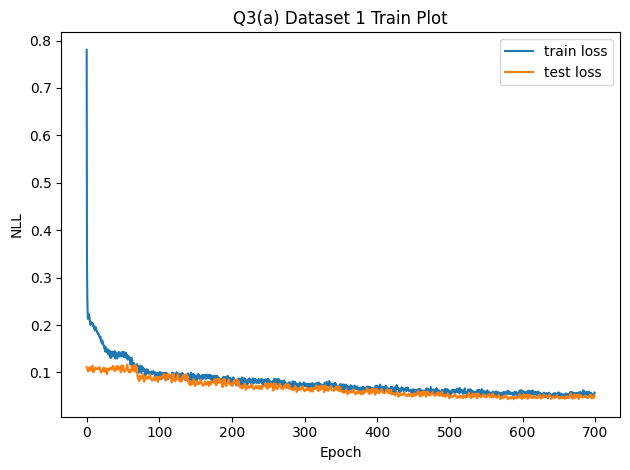

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


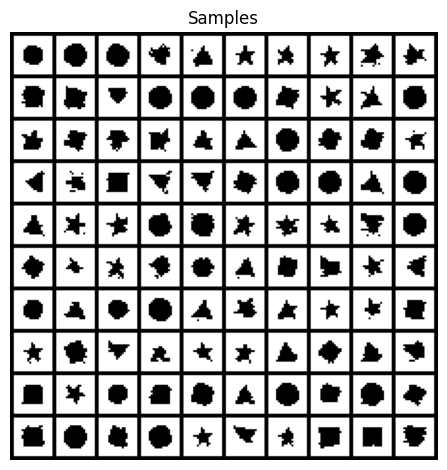

AutoregressiveTransformer(
  (token_embedding_table): Embedding(3, 128)
  (position_embedding_table): Embedding(401, 128)
  (blocks): Sequential(
    (0): Block(
      (sa): MultiHeadAttention(
        (heads): ModuleList(
          (0-3): 4 x Head(
            (key): Linear(in_features=128, out_features=32, bias=False)
            (query): Linear(in_features=128, out_features=32, bias=False)
            (value): Linear(in_features=128, out_features=32, bias=False)
            (dropout): Dropout(p=0.2, inplace=False)
          )
        )
        (proj): Linear(in_features=128, out_features=128, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
      )
      (ffwd): FeedFoward(
        (net): Sequential(
          (0): Linear(in_features=128, out_features=512, bias=True)
          (1): ReLU()
          (2): Linear(in_features=512, out_features=128, bias=True)
          (3): Dropout(p=0.2, inplace=False)
        )
      )
      (ln1): LayerNorm((128,), eps=1e-05, elementwise_a

In [22]:
q3ab_save_results(1, 'a', q3_a)

Epoch 1/10, Train Loss: 0.1801, Test Loss: 0.1530 lr: 0.0003014260546826087
Epoch 2/10, Train Loss: 0.1358, Test Loss: 0.1113 lr: 0.00015772644703569306
Epoch 3/10, Train Loss: 0.1140, Test Loss: 0.1047 lr: 0.0009704403844773336
Epoch 4/10, Train Loss: 0.1056, Test Loss: 0.0989 lr: 0.00046860474023523326
Epoch 5/10, Train Loss: 0.1011, Test Loss: 0.0933 lr: 5.449673790586624e-05
Epoch 6/10, Train Loss: 0.0980, Test Loss: 0.0981 lr: 0.0008852566213883025
Epoch 7/10, Train Loss: 0.0956, Test Loss: 0.0912 lr: 0.000639495553019617
Epoch 8/10, Train Loss: 0.0940, Test Loss: 0.0877 lr: 3.942649342770264e-06
Epoch 9/10, Train Loss: 0.0925, Test Loss: 0.0931 lr: 0.0007545207078750232
Epoch 10/10, Train Loss: 0.0914, Test Loss: 0.0885 lr: 0.0007938926261456966
Final Test Loss: 0.0946


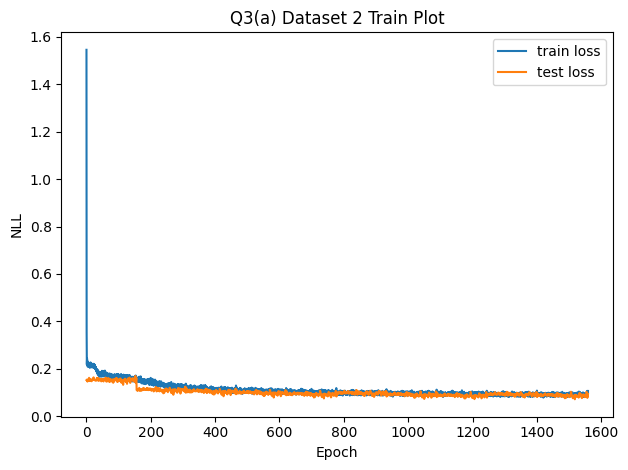

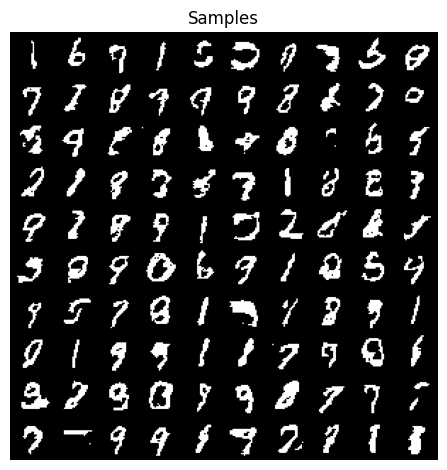

AutoregressiveTransformer(
  (token_embedding_table): Embedding(3, 128)
  (position_embedding_table): Embedding(785, 128)
  (blocks): Sequential(
    (0): Block(
      (sa): MultiHeadAttention(
        (heads): ModuleList(
          (0-3): 4 x Head(
            (key): Linear(in_features=128, out_features=32, bias=False)
            (query): Linear(in_features=128, out_features=32, bias=False)
            (value): Linear(in_features=128, out_features=32, bias=False)
            (dropout): Dropout(p=0.2, inplace=False)
          )
        )
        (proj): Linear(in_features=128, out_features=128, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
      )
      (ffwd): FeedFoward(
        (net): Sequential(
          (0): Linear(in_features=128, out_features=512, bias=True)
          (1): ReLU()
          (2): Linear(in_features=512, out_features=128, bias=True)
          (3): Dropout(p=0.2, inplace=False)
        )
      )
      (ln1): LayerNorm((128,), eps=1e-05, elementwise_a

In [23]:
q3ab_save_results(2, 'a', q3_a)

## Part (b) iGPT on Colored Shapes and MNIST

Now, implement an iGPT that models color. In order to reduce the length of token sequences, iGPT models each RGB pixel as a **single** token. This effectively reduces the context length from H*W*C to just H*W. iGPT does this through a k-means clustering approach. Because our images only each can only take on 4 values (2 bits) per channel, we can represent each pixel with 64 values (6 bits). Convert the dataset into an image of tokens and train iGPT on the colored shapes and MNIST dataset.

Checkout the iGPT paper for more details: [Generative Pretraining from Pixels](https://cdn.openai.com/papers/Generative_Pretraining_from_Pixels_V2.pdf) 

Training times and hyperparameter settings should be the same as part (a), except train for longer (15 epochs)

**You will provide these deliverables**

1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

n_head = 4
n_layer = 2
dropout = 0.2
n_embd=128
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Head(nn.Module):
    def __init__(self, head_size, block_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)

        # dropout
        wei = self.dropout(wei)

        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size, block_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size, block_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head, block_size):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size, block_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class AutoregressiveTransformer(nn.Module):
    def __init__(self, input_dim=3, n_head=4,
                 num_layers=2,
                 max_seq_length=401):
        """
        Autoregressive Transformer for image generation.
        
        :param input_dim: The size of the input dimension (number of pixel values + 1 for <bos> token).
        :param d_model: The dimension of the embeddings and transformer hidden layers.
        :param nhead: The number of heads in the multi-head attention models.
        :param num_encoder_layers: The number of layers in the transformer encoder.
        :param dim_feedforward: The dimension of the feedforward network in the transformer.
        :param max_seq_length: The maximum length of the sequences (flattened image size).
        """
        super().__init__()

        # Embedding layer to convert input tokens to dense vectors
        self.token_embedding_table = nn.Embedding(input_dim, n_embd)

        # Positional encoding to add sequence information to embeddings
        self.position_embedding_table = nn.Embedding(max_seq_length, n_embd)

        # Custom Transformer Decoder Layer with GeLU activation
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head, block_size=max_seq_length) for _ in range(num_layers)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, input_dim)


    def forward(self, idx):
        # src shape: [batch_size, seq_len]

        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)

        logits = self.lm_head(x) # (B,T,vocab_size)

        return logits

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

In [1]:
def preprocess_data(data, bos_token=2):
    """
    Preprocess color image data for the autoregressive transformer.
    Each RGB pixel is mapped to a single token, and a <bos> token is added at the beginning.

    :param data: A (n_samples, H, W, C) numpy array of images with 2-bit per channel.
    :param bos_token: An integer representing the <bos> token.
    :return: A PyTorch tensor of shape (n_samples, H*W + 1).
    """
    n_samples, H, W, C = data.shape

    # Function to map each RGB pixel to a cluster token
    def map_rgb_to_token(rgb_pixel):
        # Assuming rgb_pixel is in the format [R, G, B] with 2-bit per channel
        token = (rgb_pixel[0] << 4) + (rgb_pixel[1] << 2) + rgb_pixel[2]
        return token

    # Apply the mapping to each pixel
    data_tokenized = np.apply_along_axis(map_rgb_to_token, -1, data)

    # Flatten the image
    data_tokenized = data_tokenized.reshape(n_samples, -1)  # Shape: (n_samples, H*W)
    data_tokenized = torch.tensor(data_tokenized, dtype=torch.long)

    # Add <bos> token to the beginning of each image
    bos_tokens = torch.full((n_samples, 1), bos_token, dtype=torch.long)
    data_tokenized = torch.cat([bos_tokens, data_tokenized], dim=1)

    return data_tokenized

def generate_samples(model, num_samples, image_shape, device, bos_token=2):
    model.eval()
    H, W, _ = image_shape  # C is not used directly as each token represents a full RGB pixel
    src = torch.full((num_samples, 1), bos_token, dtype=torch.long, device=device)

    with torch.no_grad():
        for _ in range(H * W):  # Loop for H*W instead of H*W*C
            logits = model(src)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            src = torch.cat((src, idx_next), dim=1)

    # Function to map each token back to RGB values
    def map_token_to_rgb(token):
        r = (token >> 4) & 0x03
        g = (token >> 2) & 0x03
        b = token & 0x03
        return [r, g, b]

    # Convert tokens to RGB values and reshape
    generated_images = src[:, 1:].cpu().numpy()
    generated_images_rgb = np.array([[map_token_to_rgb(token) for token in row] for row in generated_images])
    generated_images_rgb = generated_images_rgb.reshape(num_samples, H, W, 3)  # Reshape to (num_samples, H, W, C)

    return generated_images_rgb

In [8]:
def q3_b(train_data, test_data, image_shape, dset_id):
    """
    train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    image_shape: (H, W, C), height, width, and # of channels of the image
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets
    
    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, C) of samples with values in {0, 1, 2, 3}
    """
    # Hyperparameters
    batch_size = 64
    learning_rate = 1e-3
    epochs = 10

    # Model Initialization
    model = AutoregressiveTransformer(input_dim=65, max_seq_length=(image_shape[0]*image_shape[1] + 1)).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)
    criterion = nn.CrossEntropyLoss()

    # Data Preprocessing
    # - Flatten images
    # - Add <bos> tokens
    train_data_processed = preprocess_data(train_data)
    test_data_processed = preprocess_data(test_data)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0.0

        np.random.shuffle(train_data)
        # Calculate the number of batches
        num_batches = train_data.shape[0] // batch_size
    
        for i in range(train_data.shape[0] // batch_size):
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            batch_data = train_data_processed[start_idx:end_idx]

            inputs = batch_data[:, :-1].to(device)  # All tokens except the last
            targets = batch_data[:, 1:].to(device)  # All tokens except the first
    
        
            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
            total_train_loss += loss.item()

            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            # Learning rate scheduling
            scheduler.step()

            train_losses.append(loss.item())

        # Evaluate on the test set
        model.eval()
        total_test_loss = 0.0
        with torch.no_grad():
            num_testbatch = test_data.shape[0] // batch_size
            for i in range(test_data.shape[0] // batch_size):
                batch_data = test_data_processed[i * batch_size:(i + 1) * batch_size]
                inputs = batch_data[:, :-1].to(device)  # All tokens except the last
                targets = batch_data[:, 1:].to(device)  # All tokens except the first
        
                outputs = model(inputs)
                test_loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
                total_test_loss += test_loss.item()
                test_losses.append(test_loss.item())

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {total_train_loss/num_batches:.4f}, Test Loss: {total_test_loss/num_testbatch:.4f} lr: {scheduler.get_last_lr()[0]}')


    # Sampling new images
    samples = generate_samples(model, num_samples=100, image_shape=image_shape, device=device)

    return np.array(train_losses), np.array(test_losses), samples

### Results

Once you've implemented `q3_b`, execute the cells below to visualize and save your results

Epoch 1/10, Train Loss: 0.6597, Test Loss: 0.2435 lr: 0.00069857394531739
Epoch 2/10, Train Loss: 0.1636, Test Loss: 0.1289 lr: 0.000157726447035655
Epoch 3/10, Train Loss: 0.1270, Test Loss: 0.1102 lr: 2.9559615522887626e-05
Epoch 4/10, Train Loss: 0.1147, Test Loss: 0.1032 lr: 0.0004686047402353448
Epoch 5/10, Train Loss: 0.1067, Test Loss: 0.1016 lr: 0.0009455032620939713
Epoch 6/10, Train Loss: 0.1006, Test Loss: 0.0966 lr: 0.0008852566213878939
Epoch 7/10, Train Loss: 0.0963, Test Loss: 0.0902 lr: 0.0003605044469804649
Epoch 8/10, Train Loss: 0.0932, Test Loss: 0.0856 lr: 3.942649342761616e-06
Epoch 9/10, Train Loss: 0.0902, Test Loss: 0.0828 lr: 0.00024547929212487014
Epoch 10/10, Train Loss: 0.0873, Test Loss: 0.0831 lr: 0.0007938926261460594
Final Test Loss: 0.0878


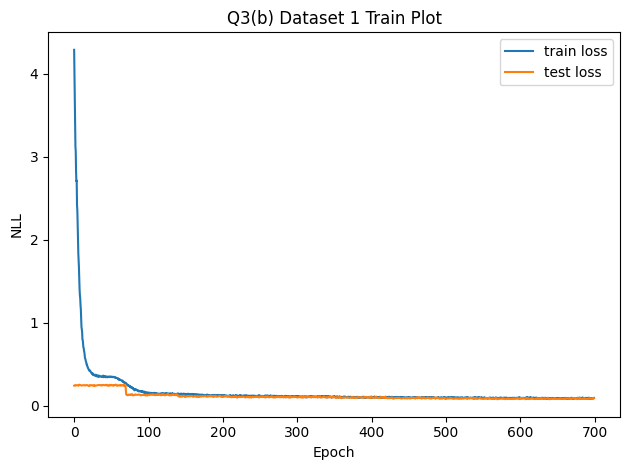

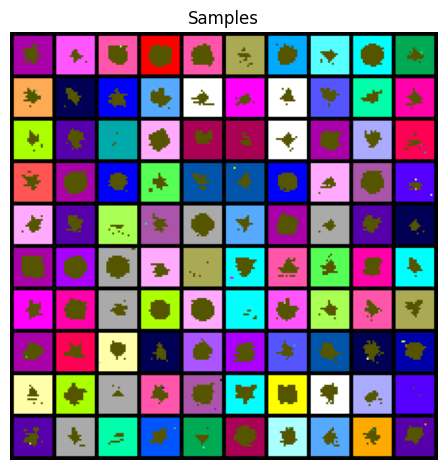

In [9]:
q3ab_save_results(1, 'b', q3_b)

Epoch 1/10, Train Loss: 0.6751, Test Loss: 0.5399 lr: 0.0003014260546826087
Epoch 2/10, Train Loss: 0.5198, Test Loss: 0.4724 lr: 0.00015772644703569306
Epoch 3/10, Train Loss: 0.4820, Test Loss: 0.4525 lr: 0.0009704403844773336
Epoch 4/10, Train Loss: 0.4548, Test Loss: 0.4122 lr: 0.00046860474023523326
Epoch 5/10, Train Loss: 0.4311, Test Loss: 0.3755 lr: 5.449673790586624e-05
Epoch 6/10, Train Loss: 0.4102, Test Loss: 0.3671 lr: 0.0008852566213883025
Epoch 7/10, Train Loss: 0.3925, Test Loss: 0.3421 lr: 0.000639495553019617
Epoch 8/10, Train Loss: 0.3783, Test Loss: 0.3136 lr: 3.942649342770264e-06
Epoch 9/10, Train Loss: 0.3655, Test Loss: 0.3162 lr: 0.0007545207078750232
Epoch 10/10, Train Loss: 0.3543, Test Loss: 0.2929 lr: 0.0007938926261456966
Final Test Loss: 0.2931


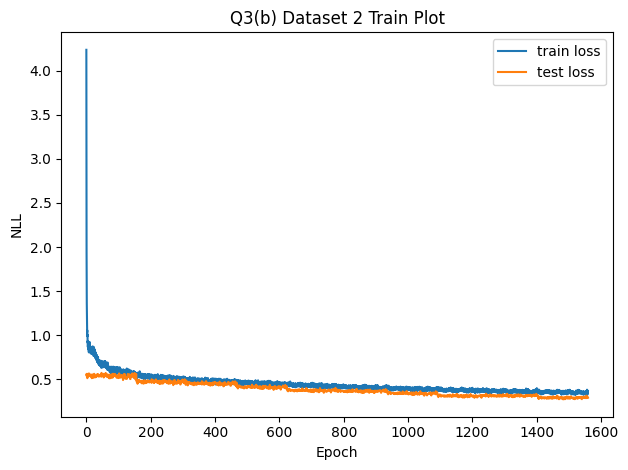

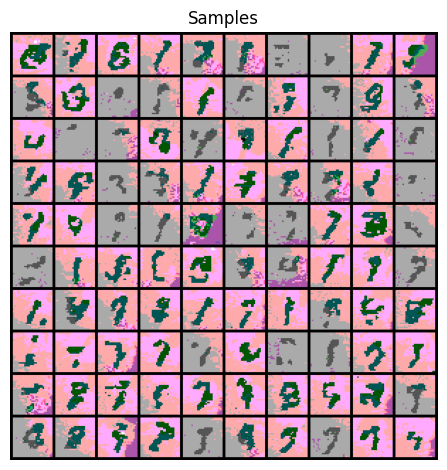

In [10]:
q3ab_save_results(2, 'b', q3_b)

## Part (c) K, V Caching for Improved Inference
You may have noticed that generation from the transformer is quite slow. Part of this is just due to the autoregressive nature. However, another part is due to some computational inefficiency. At each forward pass of the model, we are performing repeat computation of the past sequence. Specifically, we can cache the key and values at the multi attention layer to more quickly predict at each step.

In self-attention, a sequence is processed by generating three vectors for each element in the sequence: a Query (Q), a Key (K), and a Value (V). These vectors are then used to compute attention scores and subsequently the output of the attention layer.
Mathematically, this can be represented as:
 * For each index $i$, compute $Q_i$, $K_i$, $V_i$ for the current element
 * Retrieve $K_{<i}$ and $V_{<i}$ from the cache (where $<i$ denotes all indices before the current one)
 * Compute the attention output using $Q_i$, $[K_{<i}, K_i]$, $[V_{<i}, V_i]$


Next implement caching for your transformer to make inference more efficient by modifying your self attention. Use caching for inference in the future problems for faster generation! (Note caching is only used during inference). You will use the same dataset as in part B, dataset 2 of this question (colored mnist). No training is required in this section, feel free to reuse the model you trained in part B, dataset 2.

**You will provide these deliverables**

1. Over the course of inference, measure the time for the forward pass over the total sequence length with and without caching.
3. 100 samples from the final trained model using the caching inference pipeline.



In [ ]:
class Head(nn.Module):
    def __init__(self, head_size, block_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x, cache=None):
        B, T, C = x.shape

        if cache is None:
            # Initialize cache as empty tensors if not provided
            k_cache = torch.zeros((B, 0, C), device=x.device)
            v_cache = torch.zeros((B, 0, C), device=x.device)
        else:
            k_cache, v_cache = cache

        # Compute keys and values only for the new token(s)
        k_new = self.key(x[:, -1:, :])  # Shape: [B, 1, C]
        v_new = self.value(x[:, -1:, :]) # Shape: [B, 1, C]

        # Concatenate new keys and values to the cached ones
        k = torch.cat([k_cache, k_new], dim=1)  # Shape: [B, T_cached + 1, C]
        v = torch.cat([v_cache, v_new], dim=1)  # Shape: [B, T_cached + 1, C]

        q = self.query(x)  # Compute query for all tokens

        wei = q @ k.transpose(-2, -1) * C**-0.5
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim=-1)
        wei = self.dropout(wei)

        out = wei @ v

        return out, (k, v)

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size, block_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size, block_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, cache=None):
        if cache is None:
            cache = [None] * len(self.heads)

        new_cache = []
        head_outputs = []

        for i, h in enumerate(self.heads):
            head_out, head_cache = h(x, cache=cache[i])
            head_outputs.append(head_out)
            new_cache.append(head_cache)

        out = torch.cat(head_outputs, dim=-1)
        out = self.dropout(self.proj(out))

        return out, new_cache

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head, block_size):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size, block_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x, cache=None):
        sa_out, new_cache = self.sa(self.ln1(x), cache=cache)
        x = x + sa_out
        x = x + self.ffwd(self.ln2(x))
        return x, new_cache

class AutoregressiveTransformer(nn.Module):
    def __init__(self, input_dim=3, n_head=4,
                 num_layers=2,
                 max_seq_length=401):
        """
        Autoregressive Transformer for image generation.
        
        :param input_dim: The size of the input dimension (number of pixel values + 1 for <bos> token).
        :param d_model: The dimension of the embeddings and transformer hidden layers.
        :param nhead: The number of heads in the multi-head attention models.
        :param num_encoder_layers: The number of layers in the transformer encoder.
        :param dim_feedforward: The dimension of the feedforward network in the transformer.
        :param max_seq_length: The maximum length of the sequences (flattened image size).
        """
        super().__init__()

        # Embedding layer to convert input tokens to dense vectors
        self.token_embedding_table = nn.Embedding(input_dim, n_embd)

        # Positional encoding to add sequence information to embeddings
        self.position_embedding_table = nn.Embedding(max_seq_length, n_embd)

        # Custom Transformer Decoder Layer with GeLU activation
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head, block_size=max_seq_length) for _ in range(num_layers)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, input_dim)


    def forward(self, idx, cache=None):
        B, T = idx.shape

        tok_emb = self.token_embedding_table(idx)
        pos_emb = self.position_embedding_table(torch.arange(T, device=idx.device))
        x = tok_emb + pos_emb

        if cache is None:
            cache = [None] * len(self.blocks)

        new_cache = []
        for i, block in enumerate(self.blocks):
            x, block_cache = block(x, cache=cache[i])
            new_cache.append(block_cache)

        x = self.ln_f(x)
        logits = self.lm_head(x)

        return logits, new_cache


In [ ]:
def generate_samples(model, num_samples, image_shape, device, bos_token=2):
    model.eval()
    H, W, _ = image_shape
    src = torch.full((num_samples, 1), bos_token, dtype=torch.long, device=device)

    cache = None  # Initialize cache

    with torch.no_grad():
        for _ in range(H * W):  # Generate H*W tokens
            logits, cache = model(src, cache)  # Use and update cache
            logits = logits[:, -1, :]  # Focus on the last time step
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            src = torch.cat((src, idx_next), dim=1)  # Append sampled index

    # Convert generated tokens to images (reshape, map tokens to RGB, etc.)

    return generated_images

In [ ]:
def q3_c(train_data, test_data, image_shape, dset_id):
  """
  train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  image_shape: (H, W, C), height, width, and # of channels of the image
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets

  Returns
  - a (# sampling steps,) numpy array of time per sampling iteration, without caching
  - a (# sampling steps,) numpy array of time per sampling iteration, with without caching
  - a numpy array of size (100, H, C, W) of samples with values in {0, 1, 2, 3} (sample generated without caching)
  - a numpy array of size (100, H, C, W) of samples with values in {0, 1, 2, 3} (sample generated with caching)
  """
  return time_list_no_cache, time_list_with_cache, samples_no_cache, samples_with_cache

### Results

Once you've implemented `q3_c`, execute the cells below to visualize and save your results



In [ ]:
q3c_save_results(2, q3_c)

# Question 4: Causal Transformer: Tokenized Images

## Image Tokenization with Vector Quanization

## Part (a) Image Quantization

Above, we implemented iGPT, which autoregressivly predicts raw pixels. Transformers have quadratic complexity in the sequence length which prevents this naive approach from scaling well to large images.

The space of natural images often contains very correlated information. This suggests we can learn a reduced representation. VQVAE is a method that does just that, learning to map images to a more compact discrete set of tokens. We will cover this method in more detail in future lectures. The only thing you need to know now is that we can learn an encoder (and corresponding decoder), which can extract a discrete representation from an image. 

If you are curious, checkout the VQVAE paper to learn more: https://arxiv.org/abs/1711.00937 (we will cover this in a future lecture though!)

In this part, we provide a pre-trained VQVAE model, which consists of:
 * encoder to tokenize the images
 * the decoder to recover the image
 * a token vocabulary of VQVAE_MODEL.n_embeddings

Below is the code for loading the VQ model. Note that VQVAE encoding process is lossy, so the decoded images will not be the exact same as the input. Some blurriness in the recovered image is to be expected. The docstrings of the relevant methods you will need for the VQVAE_MODEL are provided below for your convenience. 

We will use 2 colored mnist datasets in this part. The first is the same dataset used in previous parts. The second, hads a colored digit on a differently colored background. We will call these datasets Colored MNIST and Colored MNIST v2. Note that the vqvae is trained per dataset.

**You will provide these deliverables**

1. Use the provided encoder model to quantize the images then inspect the recovered images by applying the decoder for each of the two datasets

In [ ]:
# @property
# def n_embeddings(self) -> int:
#     """The size of the token vocabulary"""
#    
# def quantize(self, x: np.ndarray) -> np.ndarray:
#     """Quantize an image x.
#
#     Args:
#         x (np.ndarray, dtype=int): Image to quantize. shape=(batch_size, 28, 28, 3). Values in [0, 3].
#
#     Returns:
#         np.ndarray: Quantized image. shape=(batch_size, 7, 7). Values in [0, n_embeddings]
#     """
#    
# def decode(self, z_index: np.ndarray) -> np.ndarray:
#     """Decode a quantized image.
#
#     Args:
#         z_index (np.ndarray, dtype=int): Quantized image. shape=(batch_size, 7, 7). Values in [0, n_embeddings].
#
#     Returns:
#         np.ndarray: Decoded image. shape=(batch_size, 28, 28, 3). Values in [0, 3].
#     """
# 

In [ ]:
def q4_a(images, vqvae):
  """
  images: (B, H, W, C), the images to pass through the encoder and decoder of the vqvae
  vqvae: a vqvae model, trained on the relevant dataset

  Returns
  - a numpy array of size (2, H, W, C) of the decoded image
  """
  return autoencoded_images

In [ ]:
q4a_save_results(1, q4_a)

In [ ]:
q4a_save_results(2, q4_a)

## Part (b) Autoregressive Transformer on Colored Shapes and MNIST with Vector Quantization

We can use the VQVAE to tokenize an image dataset. This will result in a much smaller sequence length than the approach we tried in Question 3(b). For this part, train a transformer on the dataset tokenized by the VQVAE.

This is a simplified version of the approach used in VQGAN [VQGAN](https://arxiv.org/abs/2012.09841) -> Section 3.2: Learning the Composition of Images with Transformers (Again, we will cover this in more detail in a future lecture!)

Update the following hyperparameters:
* layers: 4 (we can train a bigger transformer now since less memory is used per input!)
* 30 epochs

**You will provide these deliverables**

1. Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2. Report the final test set performance of your final model
3. 100 samples from the final trained model

In [ ]:
def q4_b(train_data, test_data, image_shape, dset_id, vqvae):
  """
  train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  image_shape: (H, W, C), height, width, and # of channels of the image
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets
  vqvae: a vqvae model, trained on dataset dset_id

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (100, H, C, W) of samples with values in {0, 1, 2, 3}
  """
  return train_losses, test_losses, samples

### Results

Once you've implemented `q4_b`, execute the cells below to visualize and save your results



In [ ]:
q4b_save_results(1, q4_b)

In [ ]:
q4b_save_results(2, q4_b)

# Question 5: Causal Transformer: Text

Now lets consider text! You are probably already fimilar with autoregressive transformers for text, now more commonly known as Large Language Modesl (LLMs).
We will now implement a simplified version.

We will be detailing with a [small poetry dataset](https://huggingface.co/datasets/merve/poetry). See some of the data below.

In [ ]:
data = visualize_q5_data()

## Part (a) Modeling Text
Train a transformer on the poetry dataset.

Data Preprocessing:
* We will use a simple method to tokenize the data. We will convert each unique character into a token. (Current LLMs use more sophisticated tokenizers, most commonly, [byte-pair encoding](https://huggingface.co/learn/nlp-course/chapter6/5?fw=pt))
* Previously we have leveraged a **\<bos\>** as part of the model, just like iGPT. For text, we may not always sample a sequence that starts at the beginning. Instead, we will add the **\<bos\>** token to the beginning of every sequence in the dataset, and remove the **\<bos\>** token from the model.
* Another problem is that the model must know when to stop sampling. This is done by appending an **\<eos\>**, or end of sequence token at the end of every sequence in the dataset.
* We can now convert the sequence into subsequences of size context_length, for training!

We recommend the following hyperparameters:
* Sequence length: 128
* 5 epochs

**You will provide these deliverables**

1. Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2. Report the final test set performance of your final model
3. Provide **5 unconditional samples** of **128 characters** showcasing the model text generation capabilities (text samples should stop after **\<eos\>**. Text after **\<eos\>** can be removed in post processing)

In [ ]:
import torch.utils.data as data
def q5_a(train_text, test_text):
  """
  train_text: list[str] Train text sequences.
  test_text: list[str] Test text sequences.

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a list of 5 (str), 5 generated samples from the model.
  """
  return train_losses, test_losses, text_samples

### Results

Once you've implemented `q5_a`, execute the cells below to visualize and save your results



In [ ]:
q5a_save_results(q5_a)

# Question 6: Causal Transformer: Multimodal

So far, we have been dealing only with autoregressive generation of a single modality. Now we will train a model that operates on multiple modalities!

We will use the text labeled colored MNIST dataset, which has a text description of the MNIST image. Run the cell below to visualize the data along with the text annotation. This is the Colored MNIST v2 dataset, which also comes with these text labels.

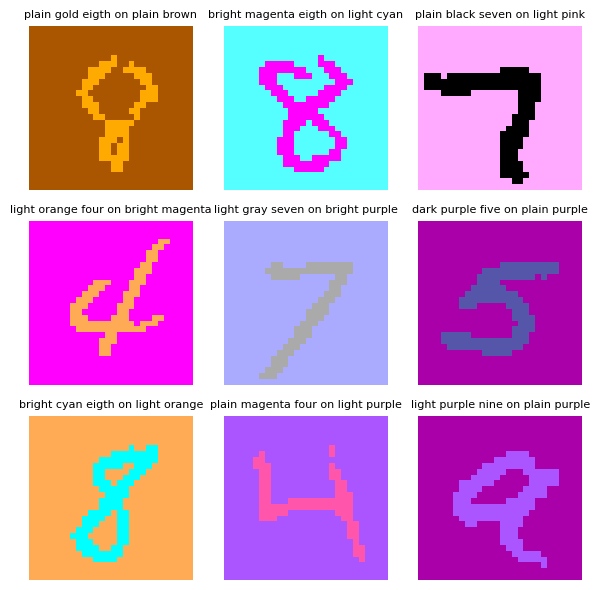

In [10]:
visualize_q6_data()

## Part (a) Multimodal Text and Image Generation
Implement and train an autoregressive (AR) model capable of handling both text and image data. The model should be designed to process sequences composed of concatenated text and image tokens in both orders (text followed by images and images followed by text). Additionally, the model should be capable of generating unconditional text and image samples.

Data Preprocessing:
* Text Tokens: Map each unique word in the text data to a unique token. (Note that all text descriptions contain the exact same amount of words. This simplifies text processing, as you won't have to deal with sequences of different lengths as in Question 5)
* Image Tokens: Quantize the image data into tokens using the VQVAE tokenizer from Problem 4.
* In this problem, we have 2 modalities. Introduce an **\<end of text\>** token and an **\<end of image\>** token. After seeing such a token, the model should switch to sampling the next modality.
* Formulate batches as sequences of concat([**\<end of image\>**, text_tokens, **\<end of text\>**, image_tokens]) and concat([**\<end of text\>**, image_tokens, **\<end of image\>**, text_tokens]). With a 50/50 split between each ordering.

Inference:
* During inference, we cannot mix modality tokens. During sampling we can restrict the logits to only be within the relevant modality.
* After **\<end of image\>**, only allow the model to sample text tokens (including **\<end of text\>**)
* After **\<end of text\>**, only allow the model to sample image tokens (including **\<end of image\>**)
* At the very start (conditioned on the **\<bos\>** token, only allow the model to sample one of (**\<end of image\>** or **\<end of text\>**))
* As the model may not always correctly sample the **\<end of image\>** token before the image ends, you may add a rule to force the model to always sample the correct number of image tokens (49 tokens).

You can use the same hyperparameters as in 4(b) (but of course, feel free to tune your model to achieve better performance)

**You will provide these deliverables**

1. Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2. Report the final test set performance of your final model
3. 9 conditional samples based on provided text.
4. 9 conditional samples based on provided images.
5. 9 unconditional samples showcasing the model's capability in generating standalone text and images.

In [3]:
from os.path import dirname, join

import matplotlib.pyplot as plt
import numpy as np
import torch

from deepul.models.vqvae import VQVAE

In [4]:
def plot_q6a_samples(samples_img_txt_tuples, filename=None, fig_title=None):
    num_samples = 9
    assert len(samples_img_txt_tuples) == num_samples
    # unzip into list of images and labels
    images = np.stack([tup[0] for tup in samples_img_txt_tuples])
    labels = [tup[1] for tup in samples_img_txt_tuples]
    images = np.floor(images.astype("float32") / 3 * 255).astype(int)
    labels = [labels[i] for i in range(len(labels))]
    plt.figure(figsize=(6, 6))
    for i in range(num_samples):
        img = images[i]
        label = labels[i]
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(label, fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    if fig_title is not None:
        plt.suptitle(fig_title, fontsize=10)

    if filename is None:
        plt.show()
    else:
        savefig(filename)

In [5]:
data_dir = get_data_dir(1)
data_dir

'deepul/homeworks/hw1/data'

In [6]:
data_dir = get_data_dir(1)
name = "colored_mnist_2"
loaded_args = torch.load(join(data_dir, f"vqvae_args_{name}_ft" + ".pth"), map_location=torch.device('cpu'))
vqvae = VQVAE(**loaded_args)
vqvae.load_state_dict(torch.load(join(data_dir, f"vqvae_{name}_ft" + ".pth"), map_location=torch.device('cpu')))

<All keys matched successfully>

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

n_head = 6
n_layer = 6
dropout = 0.05
n_embd=512
device = torch.device('cuda')

class Head(nn.Module):
    def __init__(self, head_size, block_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)

        # dropout
        wei = self.dropout(wei)

        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size, block_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size, block_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head, block_size):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size, block_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class AutoregressiveTransformer(nn.Module):

    def __init__(self, input_dim=3, n_head=4,
                 num_layers=2,
                 max_seq_length=401):
        super().__init__()
        self.max_seq_length = max_seq_length
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(input_dim, n_embd)
        self.position_embedding_table = nn.Embedding(max_seq_length, n_embd)

        # Custom Transformer Decoder Layer with GeLU activation
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head, block_size=max_seq_length) for _ in range(num_layers)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, input_dim)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        
        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)

        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.reshape(B*T, C)
            targets = targets.reshape(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -self.max_seq_length:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [12]:
train_data, test_data, train_labels, test_labels = load_colored_mnist_text(
    join(data_dir, "colored_mnist_with_text.pkl")
)
train_data = torch.tensor(train_data)
test_data = torch.tensor(test_data)
name = "colored_mnist_2"
loaded_args = torch.load(join(data_dir, f"vqvae_args_{name}_ft" + ".pth"), map_location=torch.device('cpu'))
vqvae = VQVAE(**loaded_args)
vqvae.load_state_dict(torch.load(join(data_dir, f"vqvae_{name}_ft" + ".pth"), map_location=torch.device('cpu')))

<All keys matched successfully>

In [13]:
# get all the unique characters that occur in this text
def text_map_builder(texts, bias=1024):
    result_set = set()
    for text in texts:
        words = text.split(" ")
        for word in words:
            result_set.add(word)
    vocab_size = len(result_set)
    print(f"vocab size: {vocab_size:,}")

    # create a mapping from characters to integers
    stoi = { ch:(i+bias) for i,ch in enumerate(result_set) }
    itos = { (i+bias):ch for i,ch in enumerate(result_set) }
    return stoi, itos
stoi, itos = text_map_builder(train_labels + test_labels)
def encode(s):
    s = s.split(" ")
    return [stoi[c] for c in s] # encoder: take a string, output a list of integers
def decode(l):
    return ' '.join([itos[i] for i in l]) # decoder: take a list of integers, output a string
def formulate_input(imgs, labels):
    imgs = imgs.to(dtype=torch.float)
    return vqvae.quantize(imgs)

train_labels = torch.tensor([encode(train_label) for train_label in train_labels])
test_labels = torch.tensor([encode(test_label) for test_label in test_labels])
eos_image = len(stoi) + 1024
eos_text = len(stoi) + 1024 + 1

vocab size: 31


In [14]:
eos_text

1056

In [15]:
itos

{1024: 'one',
 1025: 'bright',
 1026: 'green',
 1027: 'six',
 1028: 'gray',
 1029: 'on',
 1030: 'pink',
 1031: 'nine',
 1032: 'yellow',
 1033: 'eigth',
 1034: 'white',
 1035: 'orange',
 1036: 'magenta',
 1037: 'three',
 1038: 'plain',
 1039: 'dark',
 1040: 'normal',
 1041: 'black',
 1042: 'seven',
 1043: 'five',
 1044: 'gold',
 1045: 'brown',
 1046: 'blue',
 1047: 'light',
 1048: 'zero',
 1049: 'turquoise',
 1050: 'two',
 1051: 'cyan',
 1052: 'purple',
 1053: 'red',
 1054: 'four'}

In [16]:
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

# 将数据和标签封装进TensorDataset
dataset = TensorDataset(train_data, train_labels)
# 将数据和标签封装进TensorDataset
evalset = TensorDataset(test_data, test_labels)

batch_size = 200
num_epochs = 20
learning_rate=1e-3

# 创建DataLoader，设置batch_size为100
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)  # shuffle=True 如果你想在每个epoch打乱数据

# 创建DataLoader，设置batch_size为100
evalloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)  # shuffle=True 如果你想在每个epoch打乱数据

model = AutoregressiveTransformer(input_dim=1024+2+31, max_seq_length=57)
model.to(device=device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    loss_total = 0
    for idx, batch in enumerate(evalloader):
        data_batch, label_batch = batch[0], batch[1]
        data_batch = data_batch.to(dtype=torch.float)
        data_quant = vqvae.quantize(data_batch)
        train_data_flattened = data_quant.flatten(start_dim=1)
        tensor_eos_image = torch.full((batch_size, 1), eos_image)
        tensor_eos_text = torch.full((batch_size, 1), eos_text)

        if idx % 2 == 0:
            train = torch.cat((tensor_eos_text, train_data_flattened, tensor_eos_image, label_batch), dim=1)
        else:
            train = torch.cat((tensor_eos_image, label_batch, tensor_eos_text, train_data_flattened), dim=1)
        train_tensors = train[:, :-1].to(dtype=torch.int, device=device)
        target_tensors = train[:, 1:].to(dtype=torch.long, device=device)
        logits, loss = model(train_tensors, target_tensors)
        loss_total += loss.item()

    model.train()
    return loss_total / len(evalloader)
trainging_loss = []
eval_loss = []
# 训练循环
for epoch in range(num_epochs):
    model.train()
    with tqdm(enumerate(dataloader), total=len(dataloader), desc=f"Epoch {epoch+1}/{num_epochs}") as progress_bar:
        for idx, x_batch in progress_bar:
            data_batch, label_batch = x_batch[0], x_batch[1]
            data_batch = data_batch.to(dtype=torch.float)
            data_quant = vqvae.quantize(data_batch)
            train_data_flattened = data_quant.flatten(start_dim=1)
            tensor_eos_image = torch.full((batch_size, 1), eos_image)
            tensor_eos_text = torch.full((batch_size, 1), eos_text)
            if idx % 2 == 0:
                train = torch.cat((tensor_eos_text, train_data_flattened, tensor_eos_image, label_batch), dim=1)
            else:
                train = torch.cat((tensor_eos_image, label_batch, tensor_eos_text, train_data_flattened), dim=1)
            train_tensors = train[:, :-1].to(dtype=torch.int, device=device)
            target_tensors = train[:, 1:].to(dtype=torch.long, device=device)
            logits, loss = model(train_tensors, target_tensors)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            scheduler.step()
            trainging_loss.append(loss.item())
            progress_bar.set_postfix({"loss": f"{loss.item():.6f}"})
            # print(f"train loss {loss.item()}")
            # break
        loss_eval = estimate_loss() 
        eval_loss.append(loss_eval)
        print(f"epoch {epoch}: eval_loss {loss_eval}")


Epoch 1/20: 100%|██████████| 300/300 [00:58<00:00,  5.12it/s, loss=3.435322]


epoch 0: eval_loss 3.408096991380056


Epoch 2/20: 100%|██████████| 300/300 [00:58<00:00,  5.14it/s, loss=3.267426]


epoch 1: eval_loss 3.2668090748786924


Epoch 3/20: 100%|██████████| 300/300 [00:58<00:00,  5.15it/s, loss=3.074455]


epoch 2: eval_loss 3.0383455689748127


Epoch 4/20: 100%|██████████| 300/300 [00:58<00:00,  5.15it/s, loss=2.951055]


epoch 3: eval_loss 2.9574032028516135


Epoch 5/20: 100%|██████████| 300/300 [00:57<00:00,  5.17it/s, loss=2.841555]


epoch 4: eval_loss 2.8595287720362346


Epoch 6/20: 100%|██████████| 300/300 [00:58<00:00,  5.15it/s, loss=2.813142]


epoch 5: eval_loss 2.8208609708150227


Epoch 7/20: 100%|██████████| 300/300 [00:58<00:00,  5.15it/s, loss=2.787845]


epoch 6: eval_loss 2.7449900269508363


Epoch 8/20: 100%|██████████| 300/300 [00:58<00:00,  5.15it/s, loss=2.754466]


epoch 7: eval_loss 2.725532299677531


Epoch 9/20: 100%|██████████| 300/300 [00:58<00:00,  5.15it/s, loss=2.674557]


epoch 8: eval_loss 2.661400484244029


Epoch 10/20: 100%|██████████| 300/300 [00:58<00:00,  5.17it/s, loss=2.746128]


epoch 9: eval_loss 2.645219312508901


Epoch 11/20: 100%|██████████| 300/300 [00:58<00:00,  5.14it/s, loss=2.688453]


epoch 10: eval_loss 2.598011698722839


Epoch 12/20: 100%|██████████| 300/300 [00:58<00:00,  5.17it/s, loss=2.646452]


epoch 11: eval_loss 2.58572234471639


Epoch 13/20: 100%|██████████| 300/300 [00:58<00:00,  5.17it/s, loss=2.651080]


epoch 12: eval_loss 2.548370461463928


Epoch 14/20: 100%|██████████| 300/300 [00:58<00:00,  5.17it/s, loss=2.608051]


epoch 13: eval_loss 2.5437217020988463


Epoch 15/20: 100%|██████████| 300/300 [00:58<00:00,  5.17it/s, loss=2.518935]


epoch 14: eval_loss 2.5016428716977437


Epoch 16/20: 100%|██████████| 300/300 [00:57<00:00,  5.18it/s, loss=2.522267]


epoch 15: eval_loss 2.5022742843627928


Epoch 17/20: 100%|██████████| 300/300 [00:57<00:00,  5.17it/s, loss=2.525876]


epoch 16: eval_loss 2.460206650098165


Epoch 18/20: 100%|██████████| 300/300 [00:58<00:00,  5.17it/s, loss=2.561172]


epoch 17: eval_loss 2.4533020067214966


Epoch 19/20: 100%|██████████| 300/300 [00:58<00:00,  5.16it/s, loss=2.496382]


epoch 18: eval_loss 2.4210860006014507


Epoch 20/20: 100%|██████████| 300/300 [00:58<00:00,  5.16it/s, loss=2.430754]


epoch 19: eval_loss 2.4185686898231507


Text(0, 0.5, 'NLL')

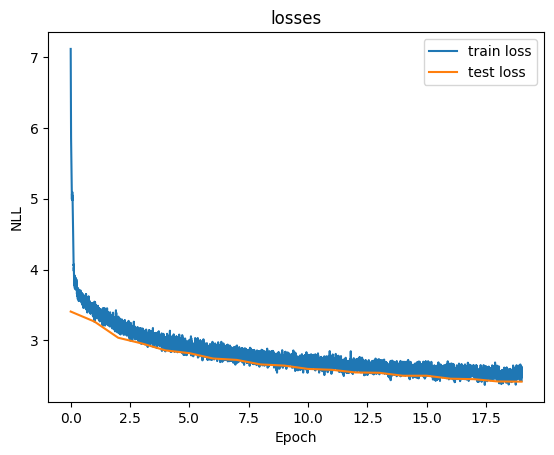

In [17]:
n_epochs = len(eval_loss) - 1
x_train = np.linspace(0, n_epochs, len(trainging_loss))
x_test = np.arange(n_epochs + 1)

plt.plot(x_train, trainging_loss, label="train loss")
plt.plot(x_test, eval_loss, label="test loss")
plt.legend()
plt.title('losses')
plt.xlabel("Epoch")
plt.ylabel("NLL")

In [18]:
torch.save(model.state_dict(), 'vlm.pth')

In [19]:
tensor_eos_image = torch.full((9, 1), eos_image)
tensor_eos_text = torch.full((9, 1), eos_text)

img_test_prompt = test_data[:9]
img_test_prompt = img_test_prompt.to(dtype=torch.float)
img_test_prompt = vqvae.quantize(img_test_prompt)
img_test_prompt = img_test_prompt.flatten(start_dim=1)
img_test_prompt = torch.cat((tensor_eos_text, img_test_prompt, tensor_eos_image), dim=1)  # get first 9 samples
text_test_prompt = torch.cat((tensor_eos_image, test_labels[:9], tensor_eos_text), dim=1)  # get first 9 samples

In [20]:
img_test_prompt.shape

torch.Size([9, 51])

In [21]:
result_text = model.generate(img_test_prompt.to(device=device), 6)
print(result_text.shape)
for r in range(9):
    d = result_text[r, 51:]
    d = d.detach().cpu().numpy()
    print(d)
    print(decode(d))

torch.Size([9, 57])
[1025 1052 1042 1029 1039 1032]
bright purple seven on dark yellow
[1039 1028 1037 1029 1038 1045]
dark gray three on plain brown
[1025 1051 1024 1029 1039 1053]
bright cyan one on dark red
[1038 1026 1050 1029 1038 1034]
plain green two on plain white
[1038 1045 1031 1029 1038 1035]
plain brown nine on plain orange
[1039 1028 1024 1029 1040 1053]
dark gray one on normal red
[1038 1045 1054 1029 1047 1030]
plain brown four on light pink
[1047 1035 1031 1029 1038 1036]
light orange nine on plain magenta
[1047 1035 1031 1029 1047 1026]
light orange nine on light green


In [22]:
result_img = model.generate(text_test_prompt.to(device=device), 49)
print(result_img.shape)
result_img = result_img[:, 8:].view(9,7,7).to(device="cpu")
print(result_img.shape, result_img.min(), result_img.max())
result_img = vqvae.decode(result_img)

torch.Size([9, 57])
torch.Size([9, 7, 7]) tensor(0) tensor(1022)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


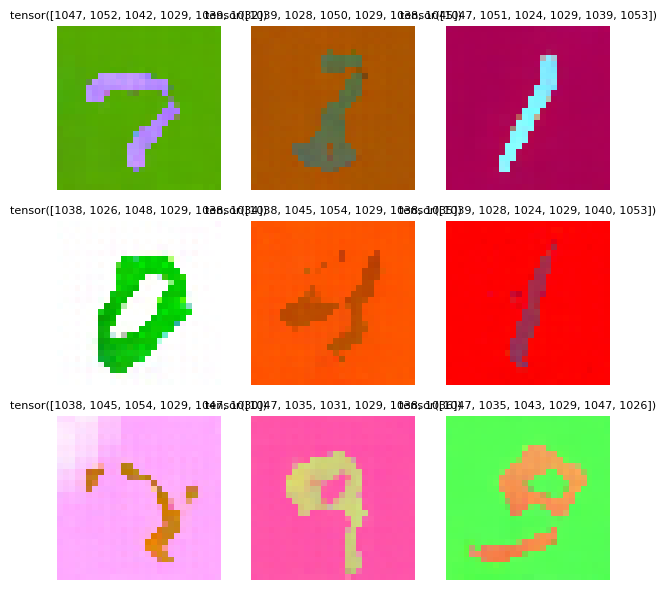

In [23]:
packed_samples = list(zip(result_img, test_labels[:9]))
plot_q6a_samples(packed_samples)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


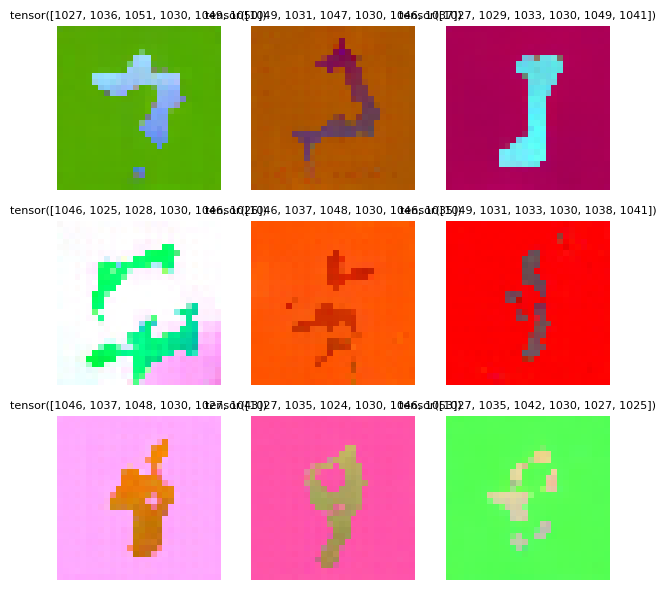

In [32]:
packed_samples = list(zip(result_img, test_labels[:9]))
plot_q6a_samples(packed_samples)

In [15]:
for r in test_labels[:9]:
    d = r
    d = d.detach().cpu().numpy()
    print(d)
    print(decode(d))

[1026 1035 1051 1052 1029 1037]
light purple seven on dark yellow
[1029 1054 1045 1052 1028 1043]
dark gray two on plain brown
[1026 1036 1047 1052 1029 1025]
light cyan one on dark red
[1028 1040 1038 1052 1028 1030]
plain green zero on plain white
[1028 1043 1050 1052 1028 1048]
plain brown four on plain orange
[1029 1054 1047 1052 1033 1025]
dark gray one on normal red
[1028 1043 1050 1052 1026 1042]
plain brown four on light pink
[1026 1048 1034 1052 1028 1031]
light orange nine on plain magenta
[1026 1048 1027 1052 1026 1040]
light orange five on light green


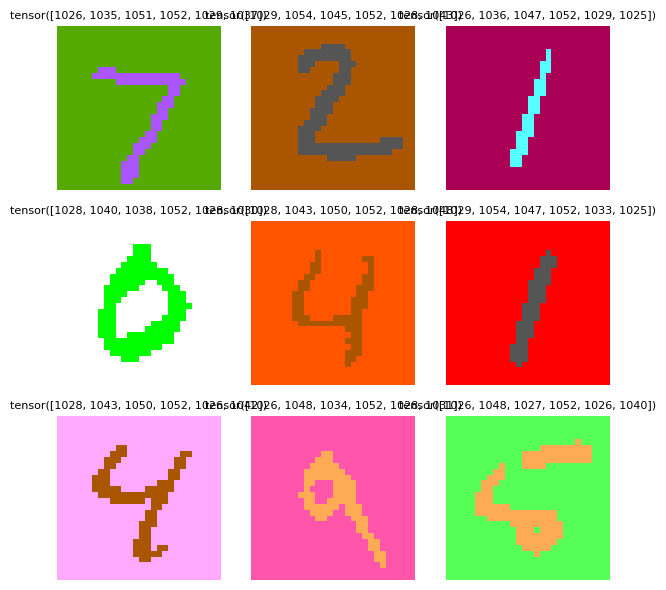

In [16]:
packed_samples = list(zip(test_data[:9], test_labels[:9]))
plot_q6a_samples(packed_samples)

In [ ]:
def q6_a(train_data, test_data, image_shape, train_text, test_text, image_test_prompt, text_test_prompt, vqvae):
  """
  train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  image_shape: tuple (H, W, C) The shape of the images in the dataset, indicating height, width, and number of color channels.
  train_text: list[str] Text data associated with each training image.
  test_text: list[str] Text data associated with each test image.
  image_test_prompt: (9, H, W, C) Image data used for generating conditional text samples during testing.
  text_test_prompt: list of 9 strings Text prompts used for generating conditional image samples during testing.
  vqvae: a vqvae model, trained on the relevant dataset

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a list of 9 (image, text), corresponding to the image conditioned samples
  - a list of 9 (image, text), corresponding to the text conditions samples
  - a list of 9 (image, text), corresponding to unconditional samples
  """
  return train_losses, test_losses, samples_image_conditioned, samples_text_conditioned, samples_unconditioned

### Results

Once you've implemented `q6_a`, execute the cells below to visualize and save your results



In [ ]:
q6a_save_results(q6_a)